      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
Train: (160, 3) Test: (40, 3)

RMSE: 1.705
R2 Score: 0.906
Ridge RMSE: 1.707
Ridge R2 Score: 0.906
RF RMSE: 1.189
RF R2 Score: 0.954


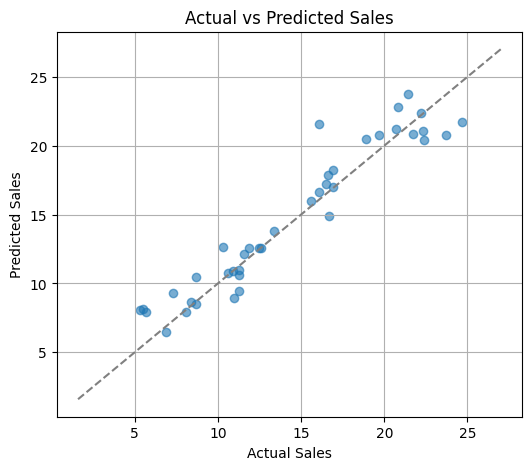


Model Coefficients:

     Feature  Coefficient
0         TV     4.668138
1      Radio     1.494965
2  Newspaper     0.094210


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("advertising.csv")
print(df.head())

#scaling
scaler = StandardScaler()
df[["TV","Radio","Newspaper"]] = scaler.fit_transform(
    df[["TV","Radio","Newspaper"]]
)

X = df[["TV","Radio","Newspaper"]]
y = df["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train:", X_train.shape, "Test:", X_test.shape)

#training
model = LinearRegression()
model.fit(X_train, y_train)

#ridge regression for comparison
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# random forest for nonlinear patterns
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

#hyperparameter tuning (compact)
param_grid = {"n_estimators": [50, 100], "max_depth": [2, 4, None]}
gs = GridSearchCV(rf, param_grid, cv=3, scoring="r2")
gs.fit(X_train, y_train)
best_rf = gs.best_estimator_

# predictions
pred = model.predict(X_test)
ridge_pred = ridge.predict(X_test)
rf_pred = best_rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_r2 = r2_score(y_test, ridge_pred)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print(f"\nRMSE: {rmse:.3f}")
print(f"R2 Score: {r2:.3f}")
print(f"Ridge RMSE: {ridge_rmse:.3f}")
print(f"Ridge R2 Score: {ridge_r2:.3f}")
print(f"RF RMSE: {rf_rmse:.3f}")
print(f"RF R2 Score: {rf_r2:.3f}")

plt.figure(figsize=(6,5))
plt.scatter(y_test, pred, alpha=.6)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "--", color="gray")
plt.grid(True)
plt.show()

coef_info = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values("Coefficient", key=np.abs, ascending=False)

print("\nModel Coefficients:\n")
print(coef_info)


Train size: (160, 3), Test size: (40, 3)

	 Results
Linear: RMSE=1.705, R2=0.906
Ridge:  RMSE=1.707, R2=0.906
RF:     RMSE=1.193, R2=0.954


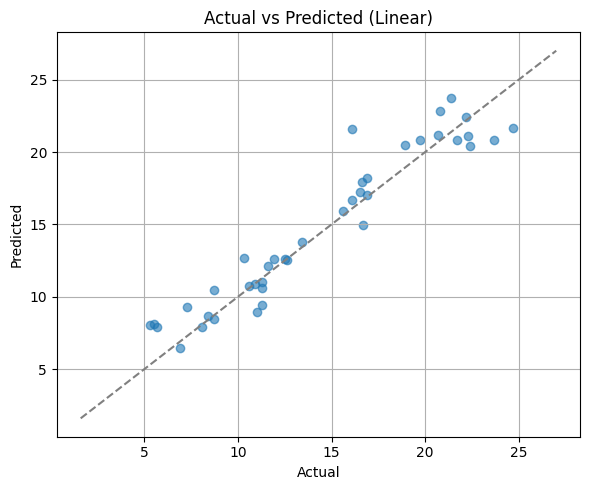


Coefficients:
      Feature      Coef
0         TV  4.668138
1      Radio  1.494965
2  Newspaper  0.094210


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("advertising.csv")

# scale features 
scaler = StandardScaler()
features = ["TV", "Radio", "Newspaper"]
df[features] = scaler.fit_transform(df[features])

X = df[features]
y = df["Sales"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

# baseline
lr = LinearRegression()
lr.fit(X_train, y_train)

#  ridge 
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

#  forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

para = {"n_estimators": [80, 120],   
    "max_depth": [None, 3, 5]}

gs = GridSearchCV(rf, para, cv=3)
gs.fit(X_train, y_train)
best_rf = gs.best_estimator_

# predictions
lr_pred = lr.predict(X_test)
ridge_pred = ridge.predict(X_test)
rf_pred = best_rf.predict(X_test)

# metric helper 
def metrics(actual, pred):
    return (
        np.sqrt(mean_squared_error(actual, pred)),
        r2_score(actual, pred)
    )

lr_rmse, lr_r2 = metrics(y_test, lr_pred)
ridge_rmse, ridge_r2 = metrics(y_test, ridge_pred)
rf_rmse, rf_r2 = metrics(y_test, rf_pred)

print("\n\t Results")
print(f"Linear: RMSE={lr_rmse:.3f}, R2={lr_r2:.3f}")
print(f"Ridge:  RMSE={ridge_rmse:.3f}, R2={ridge_r2:.3f}")
print(f"RF:     RMSE={rf_rmse:.3f}, R2={rf_r2:.3f}")

plt.figure(figsize=(6,5))
plt.scatter(y_test, lr_pred, alpha=0.6)

min_v, max_v = y.min(), y.max()
plt.plot([min_v, max_v], [min_v, max_v], "--", color="gray")

plt.title("Actual vs Predicted (Linear)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coef": lr.coef_}
                      )
print("\nCoefficients:\n", coef_df.sort_values("Coef", key=np.abs, ascending=False))
